# **EDA Analysis on Covid 19**

+**Importing all the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the data from the kaggle data set**

In [2]:
data = pd.read_csv('country_wise_latest.csv')
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


# Data Cleaning

In [3]:
data.info()   # checking all the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
data.shape     # checking the shape i.e., number of columns and rows

(187, 15)

In [5]:
data.isnull().sum()         # checking for null values

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [6]:
data.describe()     # checking the stats of the data

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


# Data Analysis

# **1. Total number of Confirmed, Deaths, Recovered and Active cases around the world**

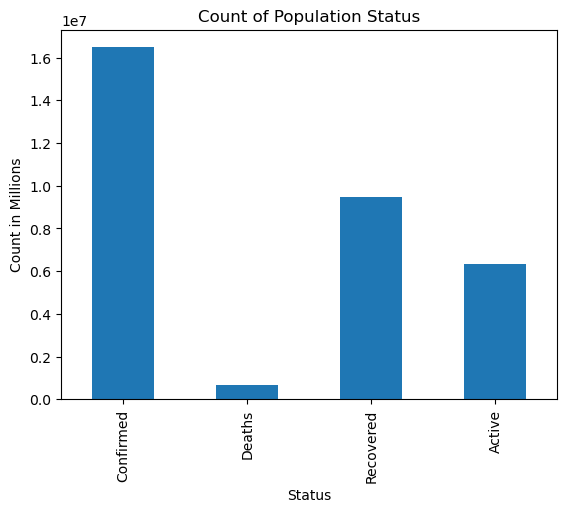

In [7]:
status_count = ['Confirmed','Deaths','Recovered','Active']
column_sums = data[status_count].sum().plot(kind = 'bar', xlabel = ('Status'),ylabel = ('Count in Millions'), title = ('Count of Population Status'))


**From the above graph, it is observed that the number of confirmed cases are high and surpassed 1.6 millions. Death toll is stands at 0.1 millions followed by Recovered and Active cases are above 0.6 millions.**

# **2. Confirmed Cases in each Region**

In [8]:
Region = data.groupby(by = 'WHO Region').sum()
Region.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO Region,,,,,,,,,,,,,,
Africa,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,723207,12223,440645,270339,12176,353,14563,110.71,2736.71,NaN,608120,115087,868.15
Americas,Antigua and BarbudaArgentinaBahamasBarbadosBel...,8839286,342732,4468616,4027938,129531,3555,94776,106.84,2180.20,NaN,7815198,1024088,571.59
Eastern Mediterranean,AfghanistanBahrainDjiboutiEgyptIranIraqJordanK...,1490744,38339,1201400,251005,12410,445,14843,78.39,1465.05,NaN,1398847,91897,230.61
Europe,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,3299523,211144,1993723,1094656,22294,304,11732,235.11,3843.56,NaN,3146816,152707,435.10
South-East Asia,BangladeshBhutanBurmaIndiaIndonesiaMaldivesNep...,1835297,41349,1156933,637015,48993,734,37582,12.96,667.04,19.56,1478283,357014,85.13


Text(0, 0.5, 'Count in Millions')

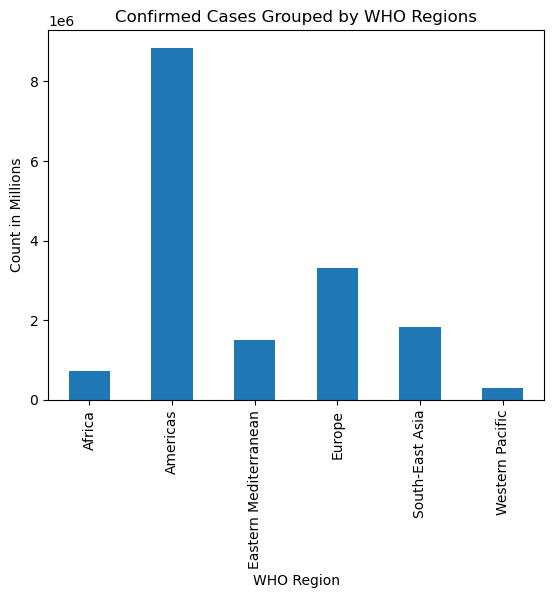

In [9]:
Region['Confirmed'].plot(kind= 'bar')
plt.title('Confirmed Cases Grouped by WHO Regions')
plt.ylabel('Count in Millions')

Text(0, 0.5, '')

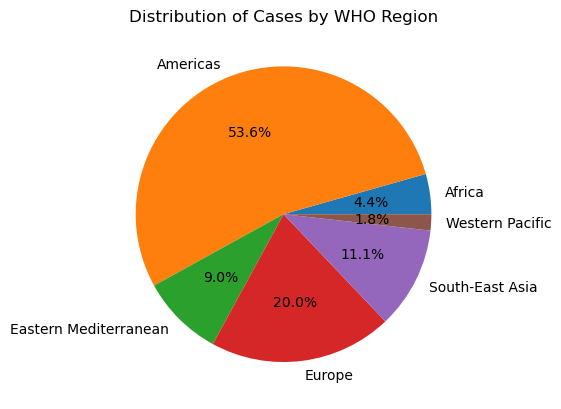

In [10]:
Region['Confirmed'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cases by WHO Region')
plt.ylabel('')

**It is observed that the highest percentage of Confirmed cases are in Americas followed by Europe at 2nd postion and while the lowest impact seen in the western pacific region**

# **3. Deaths in each Region**

Text(0, 0.5, 'Count')

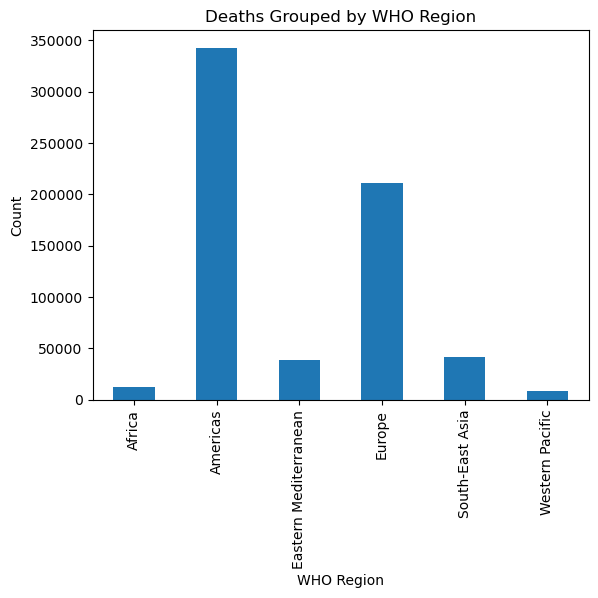

In [11]:
Region['Deaths'].plot(kind = 'bar')
plt.title('Deaths Grouped by WHO Region')
plt.ylabel('Count')

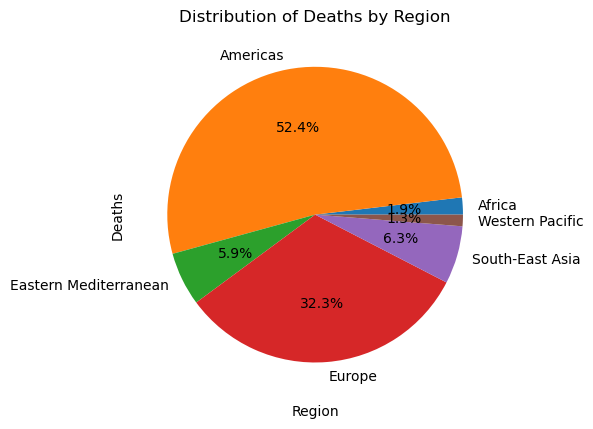

In [12]:
Region['Deaths'].plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Deaths by Region')
plt.xlabel('Region')
plt.show()

**From the above pie chart it is observed that the highest percentage of deaths occured in American Region i.e., 52.4% followed by Europ at 32.3% and the least impacted region in the deaths are Western Pacific and Africa at 1.3% and 1.9% each.**

# **4. Recovered and Active Cases grouped by WHO Regions**

Text(0, 0.5, 'Count in millions')

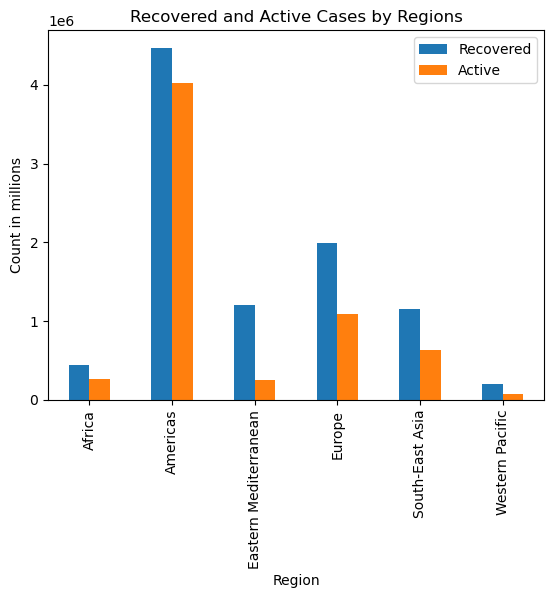

In [13]:
Region[['Recovered','Active']].plot(kind = 'bar')
plt.title('Recovered and Active Cases by Regions')
plt.xlabel('Region')
plt.ylabel('Count in millions')

**As per the above chart it is noticed that the number of active and recovered cases are high in Americas at exceeding 4 millions while the lowest is in Western Pacific below 0.5 million. And Comparatively the recovering rate of cases are higher than the active one.**

# Predictive Modeling

+Data preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Drop irrelevant columns
data.drop(['WHO Region', 'Country/Region'], axis=1, inplace=True)

In [16]:
# Feature engineering
data['%Inc Cases'] = data['New cases'].pct_change()
data['%Inc Recovered'] = data['Recovered'].pct_change()
data['%Inc Deaths'] = data['Deaths'].pct_change()

In [17]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [18]:
# Split data into features and target
X = data.drop('New cases', axis=1).values
y = data['New cases'].values

In [19]:
# Check and handle infinite values
X = np.where(np.isinf(X), np.nan, X)
X = np.nan_to_num(X, nan=np.nanmax(X))

In [20]:
# Clip extremely large values
max_threshold = np.finfo(np.float64).max
X = np.clip(X, -max_threshold, max_threshold)

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

+Model Selection and Training

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [25]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

+Model Evaluation

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
# Make predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 925.2702777777777
Mean Squared Error: 20903036.791219443


+Model Deployment

In [29]:
import joblib

In [30]:
# Save the trained model
joblib.dump(model, 'covid19_model.pkl')

['covid19_model.pkl']

In [32]:
# Load the model for predictions
loaded_model = joblib.load('covid19_model.pkl')